In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from folium.plugins import HeatMap

url = '/content/Crime_Data_from_2020_to_Present.csv'
df = pd.read_csv(url, sep=',')

df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [14]:

df['AREA'].fillna('Unknown', inplace=True)
df['TIME OCC'].fillna('Unknown', inplace=True)
df['Vict Age'].fillna(df['Vict Age'].mode()[0], inplace=True)

def categorize_crime(crime_desc):
    categories = {
        'Theft': ['theft', 'stolen', 'pickpocket'],
        'Sexual Offense': ['rape', 'sex', 'lewd', 'exposure'],
        'Court Issued Violation': ['court', 'restraining'],
        'Burglary': ['burglary'],
        'Murder': ['murder', 'homicide'],
        'Assault': ['assault'],
        'Vandalism': ['vandalism'],
        'Robbery': ['robbery'],
        'Trespassing': ['trespassing'],
        'Battery': ['battery'],
        'Criminal Threat': ['threat', 'brandish']
    }

    crime_desc_lower = crime_desc.lower()

    for category, keywords in categories.items():
        if any(keyword in crime_desc_lower for keyword in keywords):
            return category

    return 'Other'

df['Crime Category'] = df['Crm Cd Desc'].apply(categorize_crime)

print(df['Crime Category'].value_counts().head(10))

df[df['Crime Category'] == 'Other']['Crm Cd Desc'].value_counts().head(20)

<ipython-input-14-2b746e142284>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AREA'].fillna('Unknown', inplace=True)
<ipython-input-14-2b746e142284>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

Crime Category
Theft                     411474
Assault                   195408
Burglary                  124127
Vandalism                  85226
Robbery                    36926
Criminal Threat            33946
Other                      32860
Sexual Offense             22969
Court Issued Violation     21264
Trespassing                18330
Name: count, dtype: int64


,count
Crm Cd Desc,
OTHER MISCELLANEOUS CRIME,6870
DISCHARGE FIREARMS/SHOTS FIRED,2651
ARSON,2531
EXTORTION,1987
CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER),1796
FAILURE TO YIELD,1677
SHOTS FIRED AT INHABITED DWELLING,1635
DISTURBING THE PEACE,1497
CHILD NEGLECT (SEE 300 W.I.C.),1178


<ipython-input-15-25420dcb5c77>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['TIME OCC'] = df_subset['TIME OCC'].apply(lambda x: str(x).zfill(4))
<ipython-input-15-25420dcb5c77>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Hour'] = df_subset['TIME OCC'].str[:2].astype(int)


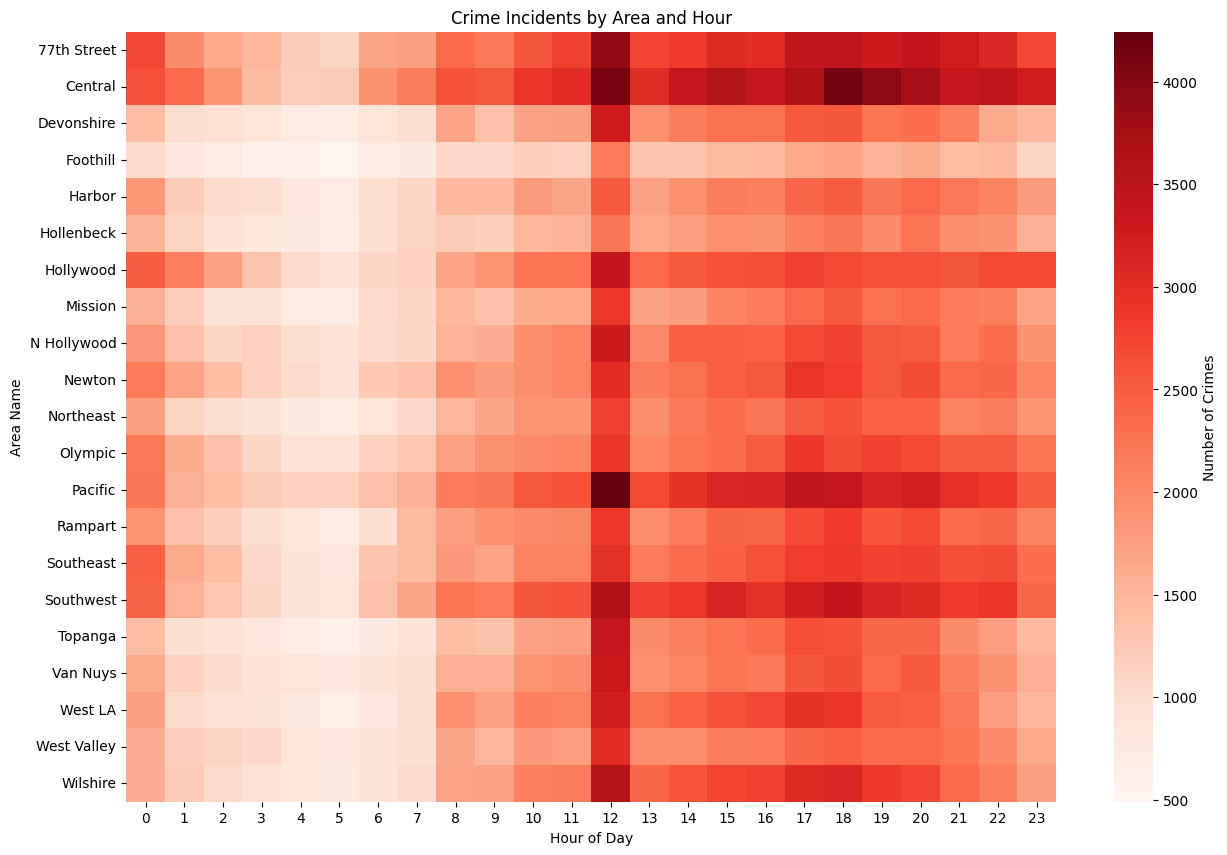

In [15]:
df_subset = df[['AREA NAME', 'TIME OCC', 'Crm Cd Desc']]

df_subset['TIME OCC'] = df_subset['TIME OCC'].apply(lambda x: str(x).zfill(4))
df_subset['Hour'] = df_subset['TIME OCC'].str[:2].astype(int)

heatmap_df = df_subset.groupby(['AREA NAME', 'Hour']).size().unstack(fill_value=0)

plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_df, cmap="Reds", annot=False, fmt="d", cbar_kws={'label': 'Number of Crimes'})
plt.title("Crime Incidents by Area and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Area Name")
plt.show()


In [16]:
features = ['Vict Age', 'AREA', 'TIME OCC']
X = df[features]

X = pd.get_dummies(X, drop_first=True)

y = df['Crime Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pca = PCA(n_components=min(X_train.shape[0], X_train.shape[1]))

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)

y_pred = knn.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 40.65%


In [17]:
plt.figure(figsize=(16, 16), dpi = 600)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=df['Crime Category'].unique(), yticklabels=df['Crime Category'].unique())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()